In [1]:
#importing libraries
import numpy as np 

%matplotlib inline 
#to use as command line calls #using inline graphs will come next to code

import matplotlib.pyplot as plt #for graphs
import os #for operating system dependent fucntionality
from keras import layers #for building layers of neural net
from keras.models import Model
from keras.models import load_model
from keras import callbacks #for training logs, saving to disk periodically
import cv2 #OpenCV(Open Source computer vision lib), containg CV algos
import string

In [2]:
#print images in dataset
os.listdir("ChaptchDataSet/Samples/")

['226md.png',
 '22d5n.png',
 '2356g.png',
 '23mdg.png',
 '23n88.png',
 '243mm.png',
 '244e2.png',
 '245y5.png',
 '24f6w.png',
 '24pew.png',
 '25257.png',
 '253dc.png',
 '25egp.png',
 '25m6p.png',
 '25p2m.png',
 '25w53.png',
 '264m5.png',
 '268g2.png',
 '28348.png',
 '28x47.png',
 '2b827.png',
 '2bg48.png',
 '2cegf.png',
 '2cg58.png',
 '2cgyx.png',
 '2en7g.png',
 '2enf4.png',
 '2fxgd.png',
 '2g783.png',
 '2g7nm.png',
 '2gyb6.png',
 '2mg87.png',
 '2mpnn.png',
 '2n73f.png',
 '2nbc5.jpg',
 '2nbcx.png',
 '2nf26.png',
 '2npg6.png',
 '2nx38.png',
 '2p2y8.png',
 '2pfpn.png',
 '2w4y7.png',
 '2wc38.png',
 '2wx73.png',
 '2x7bm.png',
 '2xc2n.png',
 '2ycn8.png',
 '2yggg.png',
 '325fb.png',
 '32cnn.png',
 '32dnn.png',
 '33b22.png',
 '33f7m.png',
 '33n73.png',
 '33ng4.png',
 '33p4e.png',
 '34b84.png',
 '34fxm.png',
 '34pcn.png',
 '368y5.png',
 '36bc2.png',
 '36nx4.png',
 '36w25.png',
 '373gb.png',
 '377xx.png',
 '378e5.png',
 '37d52.png',
 '37ep6.png',
 '387g2.png',
 '38n57.png',
 '3b4we.png',
 '3bd8

In [3]:
#total no of images in dataset
n=len(os.listdir("ChaptchDataSet/Samples/"))
n

1070

In [4]:
#defining size of image
imgshape=(50,200,1) #50-height, 200-width, 1-no of channels

In [5]:
character= string.ascii_lowercase + "0123456789" # All symbols captcha can contain
nchar = len(character) #total number of char possible
nchar

36

In [6]:
#preprocesss image
def preprocess():
  X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
  y = np.zeros((5,n,nchar)) #5*1070*36(5 letters in captcha) with all entries 0

  for i, pic in enumerate(os.listdir("ChaptchDataSet/Samples/")):
  #i represents index no. of image in directory 
  #pic contains the file name of the particular image to be preprocessed at a time
    
    img = cv2.imread(os.path.join("C:/Users/jatin/Documents/Captcha_Recoginition/ChaptchDataSet/Samples", pic), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
    
#     img = cv2.resize(img,(128,128))
    
    pic_target = pic[:-4]#this drops the .png extension from file name and contains only the captcha for training
    
    if len(pic_target) < 6: #captcha is not more than 5 letters
      img = img / 255.0 #scales the image between 0 and 1
      img = np.reshape(img, (50,200, 1)) #reshapes image to width 200 , height 50 ,channel 1 

      target=np.zeros((5,nchar)) #creates an array of size 5*36 with all entries 0

      for j, k in enumerate(pic_target):
      #j iterates from 0 to 4(5 letters in captcha)
      #k denotes the letter in captcha which is to be scanned
         index = character.find(k) #index stores the position of letter k of captcha in the character string
         target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

      X[i] = img #stores all the images
      y[:,i] = target #stores all the info about the letters in captcha of all images

  return X,y

In [7]:
def createmodel():
    img = layers.Input(shape=imgshape)
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) 
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) 
    mp3 = layers.MaxPooling2D(padding='same')(bn) 
    
    flat = layers.Flatten()(mp3) 

    outs = []
    for _ in range(5): 
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1)
        res = layers.Dense(nchar, activation='softmax')(drop)

        outs.append(res) 
    
    model = Model(img, outs)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [8]:
#Create model
model=createmodel();
model.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 200, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 50, 200, 16)  160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 25, 100, 16)  0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 25, 100, 32)  4640        ['max_pooling2d[0][0]']      

In [9]:
X,y=preprocess()

In [10]:
X_train, y_train = X[:1070], y[:, :1070]
X_test, y_test = X[970:], y[:, 970:]

In [11]:
#split the 1070 samples where 970 samples will be used for training purpose
# X_train, y_train = X[:82228], y[:, :82228]
# X_test, y_test = X[82228:], y[:, 82228:]

In [12]:
#Applying the model
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=5, epochs=200, validation_split=0.2)
#batch size- 32 defines no. of samples per gradient update
#Validation split=0.2 splits the training set in 80-20% for training nd testing

Epoch 1/200
172/172 [==============================] - 6s 22ms/step - loss: 16.5862 - dense_1_loss: 3.0646 - dense_3_loss: 3.4003 - dense_5_loss: 3.3415 - dense_7_loss: 3.3716 - dense_9_loss: 3.4082 - dense_1_accuracy: 0.1016 - dense_3_accuracy: 0.0584 - dense_5_accuracy: 0.0643 - dense_7_accuracy: 0.0584 - dense_9_accuracy: 0.0526 - val_loss: 17.6259 - val_dense_1_loss: 3.7007 - val_dense_3_loss: 3.4788 - val_dense_5_loss: 3.4738 - val_dense_7_loss: 3.4965 - val_dense_9_loss: 3.4760 - val_dense_1_accuracy: 0.0093 - val_dense_3_accuracy: 0.1028 - val_dense_5_accuracy: 0.1308 - val_dense_7_accuracy: 0.1028 - val_dense_9_accuracy: 0.1168
Epoch 2/200
172/172 [==============================] - 4s 22ms/step - loss: 12.7694 - dense_1_loss: 1.7829 - dense_3_loss: 2.5463 - dense_5_loss: 2.7233 - dense_7_loss: 2.7893 - dense_9_loss: 2.9275 - dense_1_accuracy: 0.4136 - dense_3_accuracy: 0.2617 - dense_5_accuracy: 0.1834 - dense_7_accuracy: 0.1565 - dense_9_accuracy: 0.1320 - val_loss: 16.1476 - 

Epoch 14/200
172/172 [==============================] - 4s 23ms/step - loss: 1.9835 - dense_1_loss: 0.1502 - dense_3_loss: 0.2365 - dense_5_loss: 0.3684 - dense_7_loss: 0.6451 - dense_9_loss: 0.5833 - dense_1_accuracy: 0.9463 - dense_3_accuracy: 0.9042 - dense_5_accuracy: 0.8586 - dense_7_accuracy: 0.7734 - dense_9_accuracy: 0.7874 - val_loss: 22.9387 - val_dense_1_loss: 20.0299 - val_dense_3_loss: 0.7165 - val_dense_5_loss: 0.7079 - val_dense_7_loss: 0.9470 - val_dense_9_loss: 0.5374 - val_dense_1_accuracy: 0.0374 - val_dense_3_accuracy: 0.8178 - val_dense_5_accuracy: 0.8178 - val_dense_7_accuracy: 0.7757 - val_dense_9_accuracy: 0.8224
Epoch 15/200
172/172 [==============================] - 4s 23ms/step - loss: 1.7106 - dense_1_loss: 0.1148 - dense_3_loss: 0.1946 - dense_5_loss: 0.3136 - dense_7_loss: 0.5233 - dense_9_loss: 0.5642 - dense_1_accuracy: 0.9614 - dense_3_accuracy: 0.9252 - dense_5_accuracy: 0.8808 - dense_7_accuracy: 0.8014 - dense_9_accuracy: 0.7804 - val_loss: 27.7658 -

Epoch 27/200
172/172 [==============================] - 4s 23ms/step - loss: 1.1992 - dense_1_loss: 0.0989 - dense_3_loss: 0.1340 - dense_5_loss: 0.2480 - dense_7_loss: 0.3885 - dense_9_loss: 0.3298 - dense_1_accuracy: 0.9638 - dense_3_accuracy: 0.9486 - dense_5_accuracy: 0.9077 - dense_7_accuracy: 0.8598 - dense_9_accuracy: 0.8762 - val_loss: 31.8819 - val_dense_1_loss: 28.4645 - val_dense_3_loss: 0.9234 - val_dense_5_loss: 0.8480 - val_dense_7_loss: 1.0959 - val_dense_9_loss: 0.5499 - val_dense_1_accuracy: 0.0421 - val_dense_3_accuracy: 0.8505 - val_dense_5_accuracy: 0.8364 - val_dense_7_accuracy: 0.7757 - val_dense_9_accuracy: 0.8692
Epoch 28/200
172/172 [==============================] - 4s 22ms/step - loss: 1.0869 - dense_1_loss: 0.1040 - dense_3_loss: 0.1005 - dense_5_loss: 0.2060 - dense_7_loss: 0.3657 - dense_9_loss: 0.3106 - dense_1_accuracy: 0.9603 - dense_3_accuracy: 0.9650 - dense_5_accuracy: 0.9194 - dense_7_accuracy: 0.8551 - dense_9_accuracy: 0.8808 - val_loss: 32.6154 -

Epoch 40/200
172/172 [==============================] - 4s 23ms/step - loss: 0.8495 - dense_1_loss: 0.0605 - dense_3_loss: 0.1208 - dense_5_loss: 0.1508 - dense_7_loss: 0.2772 - dense_9_loss: 0.2401 - dense_1_accuracy: 0.9825 - dense_3_accuracy: 0.9486 - dense_5_accuracy: 0.9393 - dense_7_accuracy: 0.9030 - dense_9_accuracy: 0.9042 - val_loss: 29.6340 - val_dense_1_loss: 26.1862 - val_dense_3_loss: 0.7749 - val_dense_5_loss: 1.0642 - val_dense_7_loss: 1.2143 - val_dense_9_loss: 0.3943 - val_dense_1_accuracy: 0.0421 - val_dense_3_accuracy: 0.8692 - val_dense_5_accuracy: 0.8318 - val_dense_7_accuracy: 0.7897 - val_dense_9_accuracy: 0.9065
Epoch 41/200
172/172 [==============================] - 4s 23ms/step - loss: 0.8129 - dense_1_loss: 0.0797 - dense_3_loss: 0.1070 - dense_5_loss: 0.1425 - dense_7_loss: 0.2489 - dense_9_loss: 0.2349 - dense_1_accuracy: 0.9685 - dense_3_accuracy: 0.9603 - dense_5_accuracy: 0.9393 - dense_7_accuracy: 0.9065 - dense_9_accuracy: 0.9100 - val_loss: 34.4934 -

Epoch 53/200
172/172 [==============================] - 4s 23ms/step - loss: 0.6906 - dense_1_loss: 0.0584 - dense_3_loss: 0.0731 - dense_5_loss: 0.1183 - dense_7_loss: 0.2259 - dense_9_loss: 0.2148 - dense_1_accuracy: 0.9755 - dense_3_accuracy: 0.9708 - dense_5_accuracy: 0.9556 - dense_7_accuracy: 0.9100 - dense_9_accuracy: 0.9136 - val_loss: 32.8425 - val_dense_1_loss: 29.1385 - val_dense_3_loss: 1.0166 - val_dense_5_loss: 1.0881 - val_dense_7_loss: 1.2234 - val_dense_9_loss: 0.3759 - val_dense_1_accuracy: 0.0374 - val_dense_3_accuracy: 0.8738 - val_dense_5_accuracy: 0.8364 - val_dense_7_accuracy: 0.7991 - val_dense_9_accuracy: 0.9159
Epoch 54/200
172/172 [==============================] - 4s 23ms/step - loss: 0.6429 - dense_1_loss: 0.0345 - dense_3_loss: 0.0807 - dense_5_loss: 0.1170 - dense_7_loss: 0.2014 - dense_9_loss: 0.2093 - dense_1_accuracy: 0.9883 - dense_3_accuracy: 0.9696 - dense_5_accuracy: 0.9579 - dense_7_accuracy: 0.9171 - dense_9_accuracy: 0.9264 - val_loss: 33.6805 -

Epoch 66/200
172/172 [==============================] - 4s 23ms/step - loss: 0.5610 - dense_1_loss: 0.0549 - dense_3_loss: 0.0649 - dense_5_loss: 0.1262 - dense_7_loss: 0.1441 - dense_9_loss: 0.1708 - dense_1_accuracy: 0.9813 - dense_3_accuracy: 0.9778 - dense_5_accuracy: 0.9556 - dense_7_accuracy: 0.9509 - dense_9_accuracy: 0.9357 - val_loss: 43.1566 - val_dense_1_loss: 38.5775 - val_dense_3_loss: 1.1900 - val_dense_5_loss: 1.1961 - val_dense_7_loss: 1.7945 - val_dense_9_loss: 0.3986 - val_dense_1_accuracy: 0.0374 - val_dense_3_accuracy: 0.8692 - val_dense_5_accuracy: 0.8458 - val_dense_7_accuracy: 0.7991 - val_dense_9_accuracy: 0.9299
Epoch 67/200
172/172 [==============================] - 4s 23ms/step - loss: 0.4907 - dense_1_loss: 0.0477 - dense_3_loss: 0.0560 - dense_5_loss: 0.1083 - dense_7_loss: 0.1245 - dense_9_loss: 0.1543 - dense_1_accuracy: 0.9871 - dense_3_accuracy: 0.9790 - dense_5_accuracy: 0.9591 - dense_7_accuracy: 0.9498 - dense_9_accuracy: 0.9428 - val_loss: 45.6986 -

Epoch 79/200
172/172 [==============================] - 4s 23ms/step - loss: 0.4569 - dense_1_loss: 0.0276 - dense_3_loss: 0.0642 - dense_5_loss: 0.0756 - dense_7_loss: 0.1557 - dense_9_loss: 0.1338 - dense_1_accuracy: 0.9918 - dense_3_accuracy: 0.9743 - dense_5_accuracy: 0.9778 - dense_7_accuracy: 0.9393 - dense_9_accuracy: 0.9521 - val_loss: 48.9591 - val_dense_1_loss: 43.7361 - val_dense_3_loss: 1.1588 - val_dense_5_loss: 1.4503 - val_dense_7_loss: 2.1528 - val_dense_9_loss: 0.4610 - val_dense_1_accuracy: 0.0327 - val_dense_3_accuracy: 0.8645 - val_dense_5_accuracy: 0.8364 - val_dense_7_accuracy: 0.7850 - val_dense_9_accuracy: 0.9346
Epoch 80/200
172/172 [==============================] - 4s 23ms/step - loss: 0.5087 - dense_1_loss: 0.0206 - dense_3_loss: 0.0849 - dense_5_loss: 0.1117 - dense_7_loss: 0.1694 - dense_9_loss: 0.1222 - dense_1_accuracy: 0.9930 - dense_3_accuracy: 0.9696 - dense_5_accuracy: 0.9544 - dense_7_accuracy: 0.9404 - dense_9_accuracy: 0.9533 - val_loss: 56.2912 -

Epoch 92/200
172/172 [==============================] - 4s 23ms/step - loss: 0.5636 - dense_1_loss: 0.0346 - dense_3_loss: 0.0714 - dense_5_loss: 0.1091 - dense_7_loss: 0.1831 - dense_9_loss: 0.1654 - dense_1_accuracy: 0.9883 - dense_3_accuracy: 0.9801 - dense_5_accuracy: 0.9638 - dense_7_accuracy: 0.9393 - dense_9_accuracy: 0.9439 - val_loss: 34.8544 - val_dense_1_loss: 30.7969 - val_dense_3_loss: 0.9734 - val_dense_5_loss: 1.2514 - val_dense_7_loss: 1.2990 - val_dense_9_loss: 0.5337 - val_dense_1_accuracy: 0.0374 - val_dense_3_accuracy: 0.8738 - val_dense_5_accuracy: 0.8131 - val_dense_7_accuracy: 0.7664 - val_dense_9_accuracy: 0.9206
Epoch 93/200
172/172 [==============================] - 4s 23ms/step - loss: 0.4874 - dense_1_loss: 0.0416 - dense_3_loss: 0.0542 - dense_5_loss: 0.0936 - dense_7_loss: 0.1514 - dense_9_loss: 0.1466 - dense_1_accuracy: 0.9907 - dense_3_accuracy: 0.9836 - dense_5_accuracy: 0.9661 - dense_7_accuracy: 0.9369 - dense_9_accuracy: 0.9463 - val_loss: 38.8091 -

Epoch 105/200
172/172 [==============================] - 4s 22ms/step - loss: 0.3960 - dense_1_loss: 0.0150 - dense_3_loss: 0.0691 - dense_5_loss: 0.0828 - dense_7_loss: 0.1279 - dense_9_loss: 0.1013 - dense_1_accuracy: 0.9953 - dense_3_accuracy: 0.9766 - dense_5_accuracy: 0.9731 - dense_7_accuracy: 0.9521 - dense_9_accuracy: 0.9603 - val_loss: 45.6779 - val_dense_1_loss: 40.9156 - val_dense_3_loss: 0.8696 - val_dense_5_loss: 1.4901 - val_dense_7_loss: 1.8276 - val_dense_9_loss: 0.5750 - val_dense_1_accuracy: 0.0421 - val_dense_3_accuracy: 0.9112 - val_dense_5_accuracy: 0.8551 - val_dense_7_accuracy: 0.7991 - val_dense_9_accuracy: 0.9252
Epoch 106/200
172/172 [==============================] - 4s 22ms/step - loss: 0.3393 - dense_1_loss: 0.0380 - dense_3_loss: 0.0595 - dense_5_loss: 0.0535 - dense_7_loss: 0.0856 - dense_9_loss: 0.1027 - dense_1_accuracy: 0.9883 - dense_3_accuracy: 0.9801 - dense_5_accuracy: 0.9801 - dense_7_accuracy: 0.9650 - dense_9_accuracy: 0.9638 - val_loss: 41.5922

Epoch 118/200
172/172 [==============================] - 4s 23ms/step - loss: 0.2907 - dense_1_loss: 0.0328 - dense_3_loss: 0.0494 - dense_5_loss: 0.0564 - dense_7_loss: 0.0670 - dense_9_loss: 0.0852 - dense_1_accuracy: 0.9907 - dense_3_accuracy: 0.9813 - dense_5_accuracy: 0.9848 - dense_7_accuracy: 0.9696 - dense_9_accuracy: 0.9696 - val_loss: 41.2152 - val_dense_1_loss: 36.4949 - val_dense_3_loss: 0.9368 - val_dense_5_loss: 1.4675 - val_dense_7_loss: 1.8361 - val_dense_9_loss: 0.4798 - val_dense_1_accuracy: 0.0374 - val_dense_3_accuracy: 0.9019 - val_dense_5_accuracy: 0.8318 - val_dense_7_accuracy: 0.8037 - val_dense_9_accuracy: 0.9439
Epoch 119/200
172/172 [==============================] - 4s 23ms/step - loss: 0.3325 - dense_1_loss: 0.0298 - dense_3_loss: 0.0709 - dense_5_loss: 0.0604 - dense_7_loss: 0.1079 - dense_9_loss: 0.0634 - dense_1_accuracy: 0.9918 - dense_3_accuracy: 0.9731 - dense_5_accuracy: 0.9778 - dense_7_accuracy: 0.9661 - dense_9_accuracy: 0.9766 - val_loss: 42.8908

Epoch 131/200
172/172 [==============================] - 4s 23ms/step - loss: 0.3093 - dense_1_loss: 0.0308 - dense_3_loss: 0.0405 - dense_5_loss: 0.0627 - dense_7_loss: 0.0819 - dense_9_loss: 0.0934 - dense_1_accuracy: 0.9860 - dense_3_accuracy: 0.9860 - dense_5_accuracy: 0.9790 - dense_7_accuracy: 0.9685 - dense_9_accuracy: 0.9614 - val_loss: 40.6409 - val_dense_1_loss: 35.9227 - val_dense_3_loss: 0.8796 - val_dense_5_loss: 1.2882 - val_dense_7_loss: 2.0983 - val_dense_9_loss: 0.4521 - val_dense_1_accuracy: 0.0374 - val_dense_3_accuracy: 0.8972 - val_dense_5_accuracy: 0.8458 - val_dense_7_accuracy: 0.8178 - val_dense_9_accuracy: 0.9393
Epoch 132/200
172/172 [==============================] - 4s 23ms/step - loss: 0.2824 - dense_1_loss: 0.0215 - dense_3_loss: 0.0463 - dense_5_loss: 0.0504 - dense_7_loss: 0.0918 - dense_9_loss: 0.0725 - dense_1_accuracy: 0.9953 - dense_3_accuracy: 0.9801 - dense_5_accuracy: 0.9825 - dense_7_accuracy: 0.9673 - dense_9_accuracy: 0.9731 - val_loss: 44.7084

Epoch 144/200
172/172 [==============================] - 4s 23ms/step - loss: 0.2307 - dense_1_loss: 0.0222 - dense_3_loss: 0.0311 - dense_5_loss: 0.0519 - dense_7_loss: 0.0623 - dense_9_loss: 0.0633 - dense_1_accuracy: 0.9930 - dense_3_accuracy: 0.9883 - dense_5_accuracy: 0.9825 - dense_7_accuracy: 0.9766 - dense_9_accuracy: 0.9778 - val_loss: 43.2524 - val_dense_1_loss: 38.7109 - val_dense_3_loss: 1.1545 - val_dense_5_loss: 1.1789 - val_dense_7_loss: 1.7582 - val_dense_9_loss: 0.4498 - val_dense_1_accuracy: 0.0421 - val_dense_3_accuracy: 0.8925 - val_dense_5_accuracy: 0.8318 - val_dense_7_accuracy: 0.8318 - val_dense_9_accuracy: 0.9393
Epoch 145/200
172/172 [==============================] - 4s 22ms/step - loss: 0.2782 - dense_1_loss: 0.0290 - dense_3_loss: 0.0325 - dense_5_loss: 0.0514 - dense_7_loss: 0.0894 - dense_9_loss: 0.0759 - dense_1_accuracy: 0.9895 - dense_3_accuracy: 0.9871 - dense_5_accuracy: 0.9836 - dense_7_accuracy: 0.9731 - dense_9_accuracy: 0.9755 - val_loss: 38.3700

Epoch 157/200
172/172 [==============================] - 4s 23ms/step - loss: 0.2274 - dense_1_loss: 0.0236 - dense_3_loss: 0.0528 - dense_5_loss: 0.0367 - dense_7_loss: 0.0620 - dense_9_loss: 0.0522 - dense_1_accuracy: 0.9942 - dense_3_accuracy: 0.9825 - dense_5_accuracy: 0.9860 - dense_7_accuracy: 0.9766 - dense_9_accuracy: 0.9790 - val_loss: 33.9606 - val_dense_1_loss: 30.1525 - val_dense_3_loss: 0.7421 - val_dense_5_loss: 0.9983 - val_dense_7_loss: 1.5795 - val_dense_9_loss: 0.4882 - val_dense_1_accuracy: 0.0374 - val_dense_3_accuracy: 0.9112 - val_dense_5_accuracy: 0.8364 - val_dense_7_accuracy: 0.8178 - val_dense_9_accuracy: 0.9252
Epoch 158/200
172/172 [==============================] - 4s 24ms/step - loss: 0.2117 - dense_1_loss: 0.0228 - dense_3_loss: 0.0359 - dense_5_loss: 0.0532 - dense_7_loss: 0.0475 - dense_9_loss: 0.0523 - dense_1_accuracy: 0.9907 - dense_3_accuracy: 0.9860 - dense_5_accuracy: 0.9813 - dense_7_accuracy: 0.9825 - dense_9_accuracy: 0.9813 - val_loss: 36.6254

Epoch 170/200
172/172 [==============================] - 4s 22ms/step - loss: 0.2118 - dense_1_loss: 0.0108 - dense_3_loss: 0.0293 - dense_5_loss: 0.0495 - dense_7_loss: 0.0486 - dense_9_loss: 0.0736 - dense_1_accuracy: 0.9953 - dense_3_accuracy: 0.9871 - dense_5_accuracy: 0.9825 - dense_7_accuracy: 0.9790 - dense_9_accuracy: 0.9766 - val_loss: 39.3375 - val_dense_1_loss: 34.9269 - val_dense_3_loss: 1.0354 - val_dense_5_loss: 1.3389 - val_dense_7_loss: 1.6154 - val_dense_9_loss: 0.4209 - val_dense_1_accuracy: 0.0374 - val_dense_3_accuracy: 0.8972 - val_dense_5_accuracy: 0.8505 - val_dense_7_accuracy: 0.8131 - val_dense_9_accuracy: 0.9439
Epoch 171/200
172/172 [==============================] - 4s 24ms/step - loss: 0.1695 - dense_1_loss: 0.0214 - dense_3_loss: 0.0163 - dense_5_loss: 0.0162 - dense_7_loss: 0.0655 - dense_9_loss: 0.0501 - dense_1_accuracy: 0.9942 - dense_3_accuracy: 0.9942 - dense_5_accuracy: 0.9953 - dense_7_accuracy: 0.9790 - dense_9_accuracy: 0.9813 - val_loss: 43.9613

Epoch 183/200
172/172 [==============================] - 4s 23ms/step - loss: 0.2620 - dense_1_loss: 0.0350 - dense_3_loss: 0.0556 - dense_5_loss: 0.0554 - dense_7_loss: 0.0601 - dense_9_loss: 0.0559 - dense_1_accuracy: 0.9942 - dense_3_accuracy: 0.9836 - dense_5_accuracy: 0.9801 - dense_7_accuracy: 0.9813 - dense_9_accuracy: 0.9766 - val_loss: 37.1305 - val_dense_1_loss: 33.2745 - val_dense_3_loss: 0.7461 - val_dense_5_loss: 1.2940 - val_dense_7_loss: 1.4540 - val_dense_9_loss: 0.3618 - val_dense_1_accuracy: 0.0421 - val_dense_3_accuracy: 0.8832 - val_dense_5_accuracy: 0.8411 - val_dense_7_accuracy: 0.8084 - val_dense_9_accuracy: 0.9393
Epoch 184/200
172/172 [==============================] - 4s 23ms/step - loss: 0.2478 - dense_1_loss: 0.0246 - dense_3_loss: 0.0436 - dense_5_loss: 0.0625 - dense_7_loss: 0.0456 - dense_9_loss: 0.0716 - dense_1_accuracy: 0.9918 - dense_3_accuracy: 0.9860 - dense_5_accuracy: 0.9778 - dense_7_accuracy: 0.9871 - dense_9_accuracy: 0.9743 - val_loss: 39.5731

Epoch 196/200
172/172 [==============================] - 4s 24ms/step - loss: 0.2445 - dense_1_loss: 0.0214 - dense_3_loss: 0.0455 - dense_5_loss: 0.0501 - dense_7_loss: 0.0501 - dense_9_loss: 0.0775 - dense_1_accuracy: 0.9965 - dense_3_accuracy: 0.9860 - dense_5_accuracy: 0.9836 - dense_7_accuracy: 0.9743 - dense_9_accuracy: 0.9755 - val_loss: 48.8566 - val_dense_1_loss: 43.4930 - val_dense_3_loss: 0.9681 - val_dense_5_loss: 1.6434 - val_dense_7_loss: 2.3017 - val_dense_9_loss: 0.4504 - val_dense_1_accuracy: 0.0421 - val_dense_3_accuracy: 0.8925 - val_dense_5_accuracy: 0.8411 - val_dense_7_accuracy: 0.7850 - val_dense_9_accuracy: 0.9439
Epoch 197/200
172/172 [==============================] - 4s 23ms/step - loss: 0.2246 - dense_1_loss: 0.0305 - dense_3_loss: 0.0464 - dense_5_loss: 0.0222 - dense_7_loss: 0.0702 - dense_9_loss: 0.0553 - dense_1_accuracy: 0.9918 - dense_3_accuracy: 0.9801 - dense_5_accuracy: 0.9930 - dense_7_accuracy: 0.9813 - dense_9_accuracy: 0.9848 - val_loss: 45.9772

In [13]:
import joblib 
file_name = 'Smalldatasetmodel_1.joblib' 
joblib.dump(model, file_name)

['Smalldatasetmodel_1.joblib']

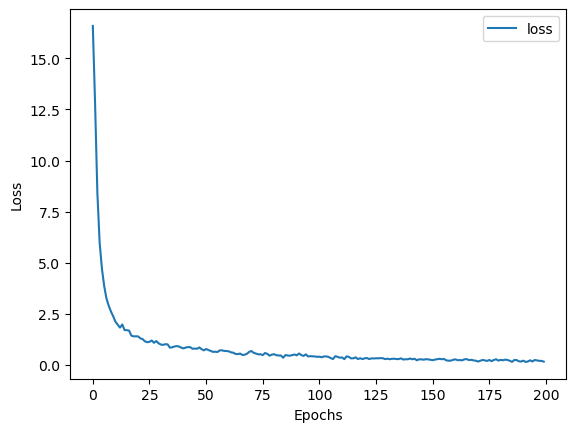

In [14]:
#graph of loss vs epochs
for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

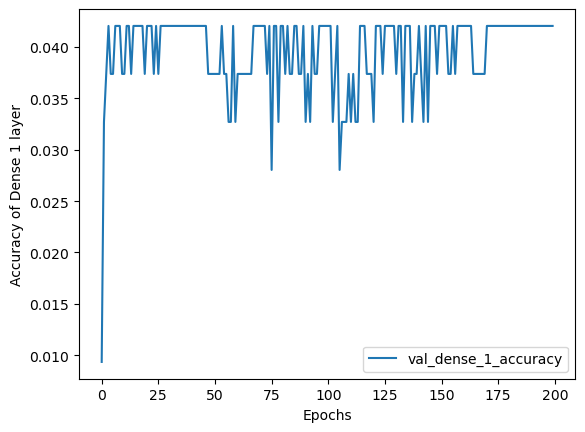

In [15]:
#graph of accuracy of dense_2 vs epochs
for label in ["val_dense_1_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 1 layer")
plt.show()

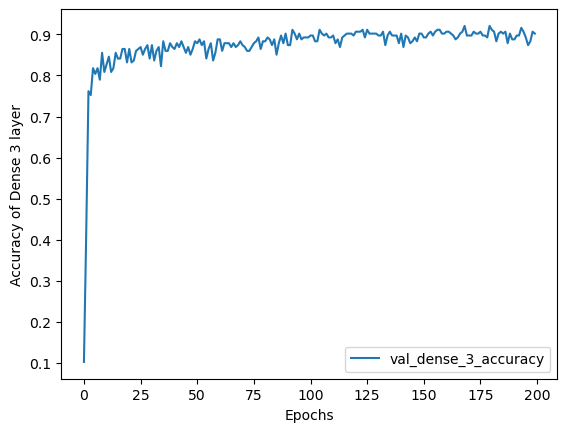

In [16]:
#graph of accuracy of dense_4 vs epochs
for label in ["val_dense_3_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 3 layer")
plt.show()

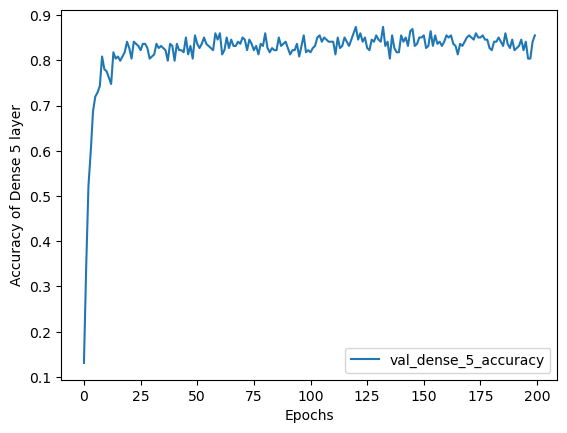

In [17]:
#graph of accuracy of dense_6 vs epochs
for label in ["val_dense_5_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 5 layer")
plt.show()

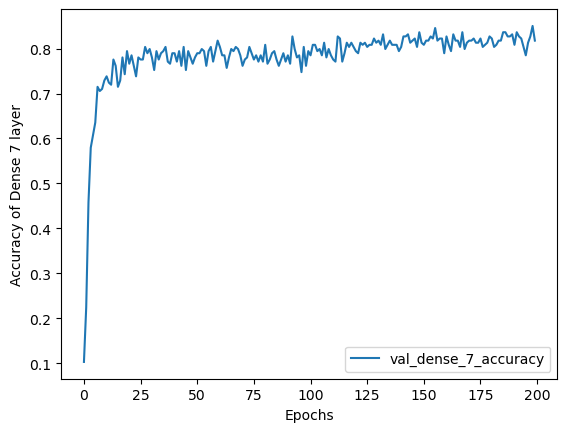

In [18]:
#graph of accuracy of dense_8 vs epochs
for label in ["val_dense_7_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 7 layer")
plt.show()

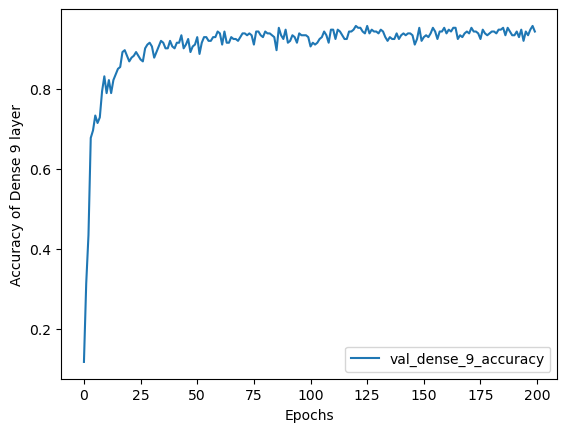

In [19]:
#graph of accuracy of dense_10 vs epochs
for label in ["val_dense_9_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 9 layer")
plt.show()

In [20]:
#Loss on training set
#Finding Loss on training set
preds = model.evaluate(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]])
print ("Loss on training set= " + str(preds[0]))

34/34 [==============================] - 1s 16ms/step - loss: 8.4603 - dense_1_loss: 7.5084 - dense_3_loss: 0.1957 - dense_5_loss: 0.2735 - dense_7_loss: 0.3944 - dense_9_loss: 0.0882 - dense_1_accuracy: 0.8084 - dense_3_accuracy: 0.9804 - dense_5_accuracy: 0.9710 - dense_7_accuracy: 0.9636 - dense_9_accuracy: 0.9888                 
Loss on training set= 8.460302352905273


In [21]:
#Finding loss on test set
preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print ("Loss on testing set= " + str(preds[0]))

4/4 [==============================] - 0s 15ms/step - loss: 38.5455 - dense_1_loss: 36.1598 - dense_3_loss: 0.1228 - dense_5_loss: 0.7907 - dense_7_loss: 1.4276 - dense_9_loss: 0.0447 - dense_1_accuracy: 0.0000e+00 - dense_3_accuracy: 0.9700 - dense_5_accuracy: 0.9000 - dense_7_accuracy: 0.8500 - dense_9_accuracy: 0.9900
Loss on testing set= 38.5455436706543


In [22]:
#to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(200,50))

    if img is not None: #image foud at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1 
    #added this bcoz x_train 970*50*200*1
    #returns array of size 1*5*36 
    result = np.reshape(res, (5, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt 

1/1 [==============================] - 0s 106ms/step
Captcha:  mx8bb


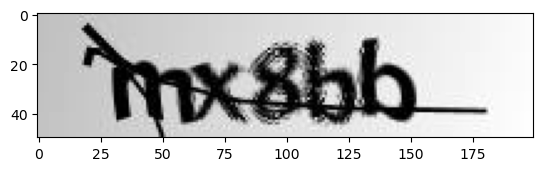

In [23]:
print("Captcha: ",predict('ChaptchDataSet/Samples/mx8bb.png'))
img=cv2.imread('ChaptchDataSet/Samples/mx8bb.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))


1/1 [==============================] - 0s 14ms/step
Captcha:  dfnx4


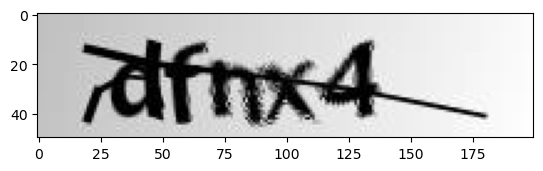

In [24]:
print("Captcha: ",predict('ChaptchDataSet/Samples/dfnx4.png'))
img=cv2.imread('ChaptchDataSet/Samples/dfnx4.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

1/1 [==============================] - 0s 16ms/step
Captcha:  m2576


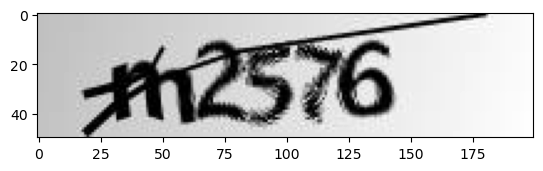

In [25]:
print("Captcha: ",predict('ChaptchDataSet/Samples/m2576.png'))
img=cv2.imread('ChaptchDataSet/Samples/m2576.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

1/1 [==============================] - 0s 14ms/step
Captcha:  fbcbx


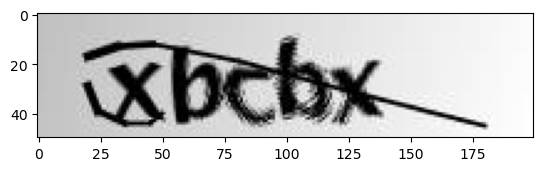

In [26]:
print("Captcha: ",predict('ChaptchDataSet/Samples/xbcbx.png'))
img=cv2.imread('ChaptchDataSet/Samples/xbcbx.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))